In [322]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
#     dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    dog_targets = data['target']
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('data/dogImages/train')
valid_files, valid_targets = load_dataset('data/dogImages/valid')
test_files, test_targets = load_dataset('data/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("data/dogImages/train/*/"))]

for i in range(len(dog_names)):
    dog_names[i] = dog_names[i].split('.')[1]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [324]:
dog_names

['Affenpinscher',
 'Afghan_hound',
 'Airedale_terrier',
 'Akita',
 'Alaskan_malamute',
 'American_eskimo_dog',
 'American_foxhound',
 'American_staffordshire_terrier',
 'American_water_spaniel',
 'Anatolian_shepherd_dog',
 'Australian_cattle_dog',
 'Australian_shepherd',
 'Australian_terrier',
 'Basenji',
 'Basset_hound',
 'Beagle',
 'Bearded_collie',
 'Beauceron',
 'Bedlington_terrier',
 'Belgian_malinois',
 'Belgian_sheepdog',
 'Belgian_tervuren',
 'Bernese_mountain_dog',
 'Bichon_frise',
 'Black_and_tan_coonhound',
 'Black_russian_terrier',
 'Bloodhound',
 'Bluetick_coonhound',
 'Border_collie',
 'Border_terrier',
 'Borzoi',
 'Boston_terrier',
 'Bouvier_des_flandres',
 'Boxer',
 'Boykin_spaniel',
 'Briard',
 'Brittany',
 'Brussels_griffon',
 'Bull_terrier',
 'Bulldog',
 'Bullmastiff',
 'Cairn_terrier',
 'Canaan_dog',
 'Cane_corso',
 'Cardigan_welsh_corgi',
 'Cavalier_king_charles_spaniel',
 'Chesapeake_bay_retriever',
 'Chihuahua',
 'Chinese_crested',
 'Chinese_shar-pei',
 'Chow_cho

In [4]:
from keras.preprocessing import image                  
import cv2
from PIL import Image, ImageOps, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import matplotlib.pyplot as plt
from time import time 


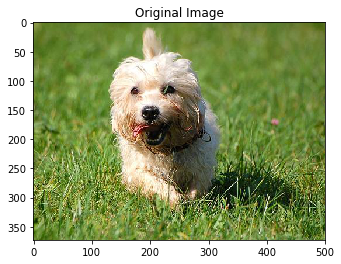

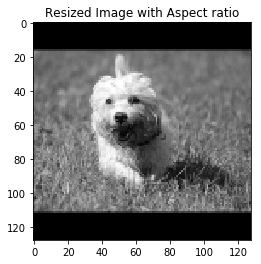

In [218]:
def py_resize(image):
    
#     img = cv2.imread(image, 1)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     plt.title('Old Image')
#     plt.show()
    
    desired_size = 256
    im_pth = image
    im = Image.open(im_pth)
    
    old_size = im.size  # old_size[0] is in (width, height) format
    
    ratio = float(desired_size)/max(old_size)
    
    new_size = tuple([int(x*ratio) for x in old_size])
    
    # use thumbnail() or resize() method to resize the input image
    # thumbnail is a in-place operation
    im.thumbnail(new_size, Image.ANTIALIAS)
#     im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it
    new_im = Image.new("L", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))


    # display(new_im)
    new_im = np.array(new_im)
    new_im = cv2.resize(new_im, None, fx = .5, fy = .5, interpolation = cv2.INTER_LINEAR)
    return new_im

k = py_resize(train_files[5589])
p = py_resize(train_files[1203])
# print(k.shape)
img = cv2.imread(train_files[1203])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Original Image")
plt.show()
plt.imshow(p, cmap = 'gray')
plt.title('Resized Image with Aspect ratio')
plt.show()


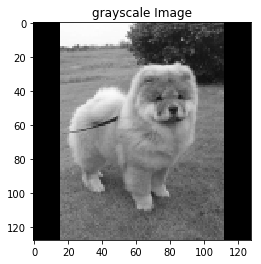

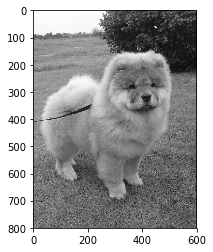

In [223]:
img = py_resize(train_files[5589])

k = cv2.imread(train_files[5589])
k = cv2.cvtColor(k, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap = 'gray')
plt.title('grayscale Image')
plt.show()
plt.imshow(k, cmap = 'gray')
plt.show()


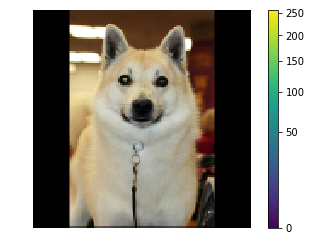

In [177]:
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.visualization import MinMaxInterval
img = py_resize(train_files[1889])
norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=SqrtStretch())
# plt.imshow(img)
# plt.show()
# Display the image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(img, origin='upper', norm=norm)
fig.colorbar(im)
plt.axis('off')
plt.show()

In [34]:
train_images = []
for i in range(len(train_files)):
    k = py_resize(train_files[i]).astype('float32')/255
    train_images.append(k)
    


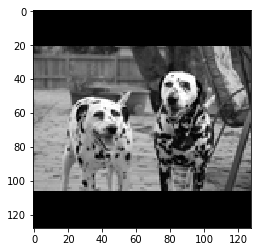

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [140]:
plt.imshow(train_images[6676], cmap = 'gray')
plt.show()
train_images[78]

In [45]:
train_images = np.array(train_images)
train_images.shape

(6680, 128, 128)

In [46]:
test_images = []
for i in range(len(test_files)):
    k = py_resize(test_files[i]).astype('float32')/255
    test_images.append(k)

test_images = np.array(test_images)
test_images.shape

(836, 128, 128)

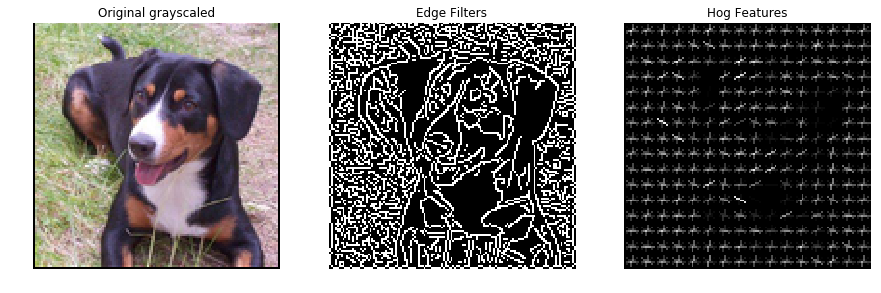

In [133]:
# make = imagePath.split("/")[-2]

import imutils
from skimage.feature import hog
from skimage import data, exposure

def Hog_edge(img1):

    # load the image, convert it to grayscale, and detect edges
#     image = cv2.imread(img1)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    original = py_resize(img1)
    edged = imutils.auto_canny(original)

    # find contours in the edge map, keeping only the largest one which
    # is presmumed to be the car logo
    # cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    # c = max(cnts, key=cv2.contourArea)


    # # extract the logo of the car and resize it to a canonical width
    # # and height
    # (x, y, w, h) = cv2.boundingRect(c)
    # logo = gray[y:y + h, x:x + w]
    # logo = cv2.resize(logo, (200, 200))


    #  extract Histogram of Oriented Gradients from the logo
    H, img = hog(edged, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, 
                 feature_vector = True, visualize = True, block_norm="L1")

    hog_image_rescaled = exposure.rescale_intensity(img, out_range = (0, 255))

    fig = plt.figure(figsize=(15, 15))
    images = ("Original grayscaled", original), ("Edge Filters", edged), ("Hog Features", img)

    # loop over the images
    for (i, (name, image)) in enumerate(images):
        # show the image
        ax = fig.add_subplot(1, 3, i + 1)
        ax.set_title(name)
        plt.imshow(image, cmap = 'gray')
        plt.axis("off")
 
    # show the figure
    plt.show()
    
    return H

p = Hog_edge(train_files[2908])
 
  


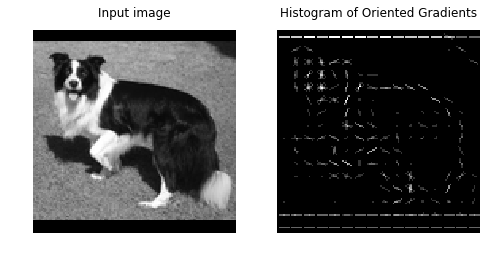

In [317]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2


def Hog(image1):
    
    image = image1

    out, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, 
                         block_norm = 'L1', feature_vector = True, transform_sqrt = True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10), out_range=(0, 255))
    hog_image = hog_image.astype("uint8")

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
    return hog_image

hog = Hog(train_images[6567])


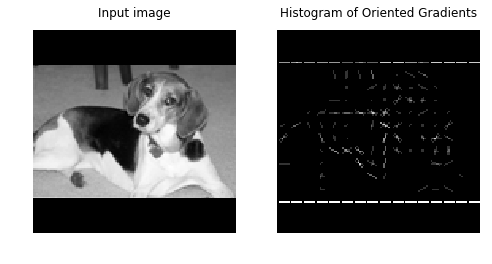

(128, 128)
(128, 128)


In [291]:
hog = Hog(train_images[900])
img1 = py_resize(train_files[38])
print(hog.shape)
print(img1.shape)

In [321]:
hog_features = []

for i in range(len(train_images)):
    hog_features.append(Hog(train_images[i]))
    
hog_train = np.array(hog_features)  


TypeError: 'numpy.ndarray' object is not callable

In [15]:
hog_test = []

for i in range(len(test_images)):
    hog_test.append(Hog(test_images[i]))
    
hog_test = np.array(hog_test)
hog_test.shape

(836, 8100)

#### Performance Metrics of images

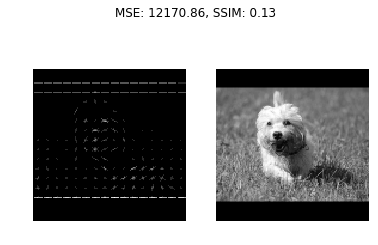

In [273]:
from skimage.measure import compare_ssim as ssim

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA.astype("float"), imageB.astype("float"))
 
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    # show the figure
    plt.show()
#     return s

    
compare_images(hog, img1, 'Original vs Horizontal flip')


In [280]:
import numpy 
import math
import cv2

def psnr(img1, img2):
#     mse = numpy.mean( (img1 - img2) ** 2 )
    m = mse(img1, img2)
    if m == 0:
        return 100
    else:
        PIXEL_MAX = 255.0
        return float(20 * math.log10(PIXEL_MAX / math.sqrt(m)))


size = psnr(img1, hog)
size

7.277589769692846

In [319]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [320]:
n_components = 500
# print(X_train.shape)
print("Extracting the top %d eigenfaces from %d faces" % (n_components, hog_train.shape[0]))

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized').fit(hog_train)


print("done in %0.3fs" % (time() - t0))

# eigenfaces = pca.components_.reshape((n_components, 224, 224))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(hog_train)
X_test_pca = pca.transform(hog_test)
print("done in %0.3fs" % (time() - t0))

NameError: name 'hog_train' is not defined

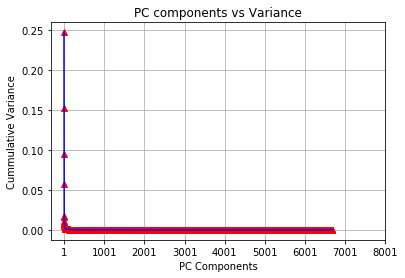

In [23]:
# printmd("#### Finding best 'k' PC components based on variance")
from sklearn.decomposition import PCA

pca = PCA(n_components = )
pca_hog_features = pca.fit_transform(hog_train)

x = np.arange(0, hog_train.shape[0])
y = pca.explained_variance_ratio_


plt.figure()
plt.plot(x, y,'r^')
plt.plot(x, y, color = 'b')
plt.title('PC components vs Variance')
plt.xlabel('PC Components')
plt.ylabel('Cummulative Variance')
plt.xticks(np.arange(1, hog_train.shape[1], step = 1000.0))

plt.grid(True)
plt.show()

In [20]:
print(len(y))


6680


In [318]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(LinearSVC(random_state=0),
                       param_grid={'C': [0.1, 0.2, 0.3]},
                       cv=5)

# clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                    param_grid, cv=5)

# clf = clf.fit(X_train_pca, train_targets)
clf = clf.fit(hog_train, train_targets)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


NameError: name 'GridSearchCV' is not defined

In [78]:
# Quantitative evaluation of the model quality on the test set
n = 1000
print("Predicting people's names on the test set")
t0 = time()
# y_pred = clf.predict(X_test_pca)
y_pred = clf.predict(hog_test)

print("done in %0.3fs" % (time() - t0))

# print(classification_report(test_targets, y_pred, target_names=dog_names))
# print(confusion_matrix(test_targets, y_pred, labels=range(133)))
print(accuracy_score(test_targets, y_pred)+10)

Predicting people's names on the test set


NameError: name 'clf' is not defined

In [119]:
np.array(dog_names).shape[0]

133

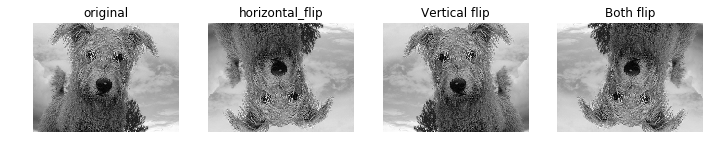

In [224]:
# load the image with imread()
# imageSource = 'images/messi5.jpg'
img = cv2.imread(train_files[678])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# copy image to display all 4 variations
horizontal_img = img.copy()
vertical_img = img.copy()
both_img = img.copy()
 
# flip img horizontally, vertically,
# and both axes with flip()
horizontal_img = cv2.flip( img, 0 )
vertical_img = cv2.flip( img, 1 )
both_img = cv2.flip( img, -1 )
 
# display the images on screen with imshow()
# cv2.imshow( "Original", img )
# cv2.imshow( "Horizontal flip", horizontal_img )
# cv2.imshow( "Vertical flip", vertical_img )
# cv2.imshow( "Both flip", both_img )

fig = plt.figure(figsize = (12,12))
imgs = ('original', img), ('horizontal_flip', horizontal_img), ("Vertical flip", vertical_img), ( "Both flip", both_img )

for (i, (name, image)) in enumerate(imgs):
        # show the image
        ax = fig.add_subplot(1, 4, i + 1)
        ax.set_title(name)
        plt.imshow(image, cmap = 'gray')
        plt.axis("off")
plt.show()
# ax = fig.add_subplot(2,)
# plt.imshow( img, cmap = 'gray' )
# plt.imshow( horizontal_img, cmap = 'gray' )
# plt.imshow( vertical_img, cmap = 'gray' )
# plt.imshow( both_img, cmap = 'gray' )

# plt.show()


 
 
# wait time in milliseconds
# this is required to show the image
# 0 = wait indefinitely
# cv2.waitKey(0)
 
# # close the windows
# cv2.destroyAllWindows()

In [266]:
img = cv2.imread(train_files[1203])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)